## <center> ID5002W:Industrial AI Laboratory
### <center> Week-12 (part-1)
### <center> Convolutional Neural Networks

**Contents:** 
1. Convolution operation 
2. Image processing using the kernels
3. Downloading and looking in to the CIFAR10 dataset
4. Defining and training a CNN model
5. Visualizing the output from each of the convolutional layer



In [2]:
# Importing neccesary libraries
import os
import numpy as np # For linear algebra
import matplotlib.pyplot as plt # For data visulization
import matplotlib.image as mpimg # For seeing an image 

import torch
import torch.nn as nn # To build the neural network layers
import torch.nn.functional as F # To use non-linear function (Eg: Relu)
from torchvision import datasets # To load CIFAR datasets
from torchvision.transforms import ToTensor # To transform the image to a tensor
from torch.utils.data import DataLoader # To wrap an iterative over the image folder
import torch.optim as optim # To choose the optimizer

# Convolution operation

#Parameters of the below given network
input_channels: 1 <br>
ouput_channels: 1 <br>
stride_size: 1 <br>
kernel_size: 3*3 <br>
padding: 1 <br>

![convolution anim.gif](https://drive.google.com/uc?export=view&id=1KjhcyG1WB3Q3_UW1jSRub9PKIev1Evhz)

# Image processing using the kernels

In [3]:
# Defining a convolutional operation and plotting the input and output image
def convolve(image,kernel):
  '''
  image: A numpy array defining a greyscale image
  kernel: Kernel defining the convolutional operation (shape must be an odd number)
  '''
  image=image/255
  image_h = image.shape[0] # Image height
  image_w = image.shape[1] # Image width
  k_s = kernel.shape[0] # Kernel shape
  padded_image = np.zeros((image_h+k_s-1,image_w+k_s-1)) # zero padding
  temp=int((k_s-1)/2)
  padded_image[temp:-temp,temp:-temp] = image # Zero padded image
  new_image=[] # Empty list to store the outputs
  for r_p in range(image_h):
    for c_p in range(image_w):
      # Convolution operation
      sub_image = padded_image[r_p:r_p+k_s,c_p:c_p+k_s].flatten()
      output = np.dot(sub_image,kernel.flatten())
      # Appending the output
      new_image.append(output)
  output_image=np.array(new_image).reshape(image_h,image_w) # list to numpy array
  # plotting the image
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  ax[0].imshow(np.clip(image,a_min=0,a_max=1),cmap='gray')
  ax[0].set_title('Original image')
  ax[1].imshow(np.clip(output_image,a_min=0,a_max=1),cmap='gray')
  ax[1].set_title('Convoluted image')
  return output_image

In [ ]:
# loading the image
os.chdir('C:\\Users\\Admin\\Coding-M-Tech\\AI Lab - ID5002W\\Class Code\\Data')
sri_img = mpimg.imread('Srirangam.jpg')
plt.imshow(sri_img,cmap='gray')
plt.show()

# Blur kernel

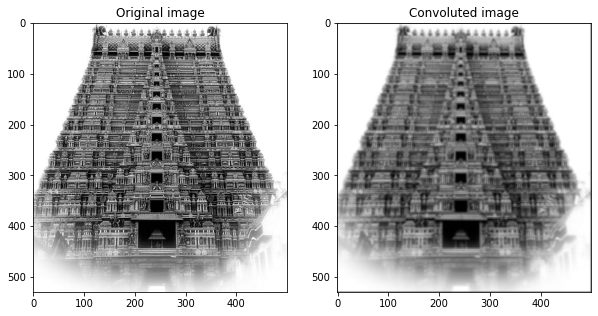

In [5]:
# kernel to blur the image
blur_kernel = np.ones((5,5))/(25)
output_image = convolve(sri_img,blur_kernel)

# Edge detection kernel

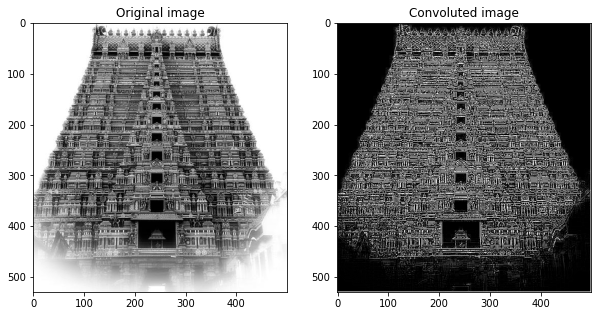

In [6]:
# kernel to detect the edges in an image
edge_kernel = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
output_image = convolve(sri_img,edge_kernel)

# Kernel to sharpen the image

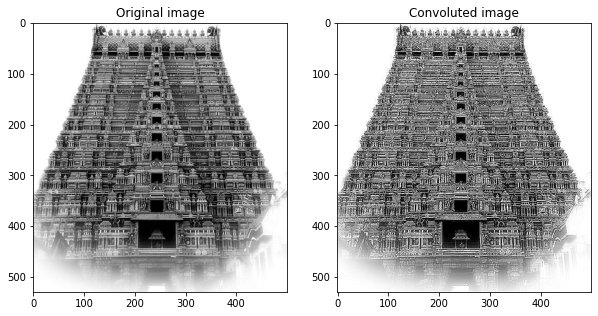

In [7]:
# kernel to sharpen an image
sharp_kernel = np.array([[0,-1,0],
                         [-1,5,-1],
                         [0,-1,0]])
output_image = convolve(sri_img,sharp_kernel)

# Downloading and looking in to the CIFAR10 dataset

In [8]:
# downloading the cifar10 dataset
train_data = datasets.CIFAR10(root="data",train=True,download=True,transform=ToTensor())

test_data = datasets.CIFAR10(root="data",train=False,download=True,transform=ToTensor())

# Labels of the images
label_class = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [9]:
# Wrapping the train and test dataset to the iterative function "DataLoader"
traindataloader =DataLoader(train_data, batch_size=16, shuffle=True,num_workers = 2)
testdataloader =DataLoader(test_data, batch_size=8, shuffle=True,num_workers = 2)

In [10]:
# Size of the data
X, y = next(iter(traindataloader))
print('The shape of the independent variable is',X.size())
print('The shape of the independent variable is',y.size())

The shape of the independent variable is torch.Size([16, 3, 32, 32])
The shape of the independent variable is torch.Size([16])


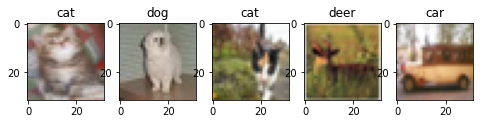

In [11]:
# Visualizing the images
fig,ax=plt.subplots(1,5,figsize=(8,2))
for i,a in enumerate(ax):
  img = X[i]
  n_label = y[i]
  a.imshow(img.permute(1, 2, 0))
  a.set_title(label_class[n_label])
plt.show()

# Defining and training a CNN model

In [12]:
class CNN_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_1=nn.Conv2d(in_channels=3, out_channels=7, kernel_size=5) # convolutional layer
    self.max_2=nn.MaxPool2d(2, 2) # Maxpooling layer
    self.conv_3=nn.Conv2d(in_channels=7, out_channels=15, kernel_size=3) # convolutional layer
    self.max_4=nn.MaxPool2d(2, 2) # Maxpooling layer
    self.lin_5=nn.Linear(540, 200) # fully connected layer
    self.lin_6=nn.Linear(200, 50) # fully connected layer
    self.lin_7=nn.Linear(50, 10) # fully connected layer
    
  def forward(self, x):
    x = self.max_2(F.relu(self.conv_1(x)))
    x = self.max_4(F.relu(self.conv_3(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = F.relu(self.lin_5(x))
    x = F.relu(self.lin_6(x))
    x = F.relu(self.lin_7(x))
    return x

# To get the output values from the layers in between
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


model = CNN_model()

In [13]:
# Check if GPU is available so that the model can be trained on a GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN_model(
  (conv_1): Conv2d(3, 7, kernel_size=(5, 5), stride=(1, 1))
  (max_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(7, 15, kernel_size=(3, 3), stride=(1, 1))
  (max_4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lin_5): Linear(in_features=540, out_features=200, bias=True)
  (lin_6): Linear(in_features=200, out_features=50, bias=True)
  (lin_7): Linear(in_features=50, out_features=10, bias=True)
)

In [15]:
# defining the loss and the optimizer
loss_metric = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
# Training the model
for epoch in range(10): # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(traindataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) # to gpu
        optimizer.zero_grad() # zero the parameter gradients
        outputs = model(inputs) # Forward pass
        loss = loss_metric(outputs, labels) # Cross entropy loss
        loss.backward() # backward pass
        optimizer.step() # Optimizing the parameters
        running_loss += loss.item() # calculating the loss
    print(f'For epoch {epoch+1}: The loss is:{running_loss/3125}')
    running_loss = 0.0

For epoch 1: The loss is:2.0247725149917604
For epoch 2: The loss is:1.8063070526504517
For epoch 3: The loss is:1.7171762277603149
For epoch 4: The loss is:1.6606163183021545
For epoch 5: The loss is:1.613994460105896
For epoch 6: The loss is:1.5756928287315368
For epoch 7: The loss is:1.541518118724823
For epoch 8: The loss is:1.5114102972602845
For epoch 9: The loss is:1.484482010383606
For epoch 10: The loss is:1.4578758044242859


In [17]:
# Test accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testdataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 44 %


# Visualizing the outputs in each of the layers

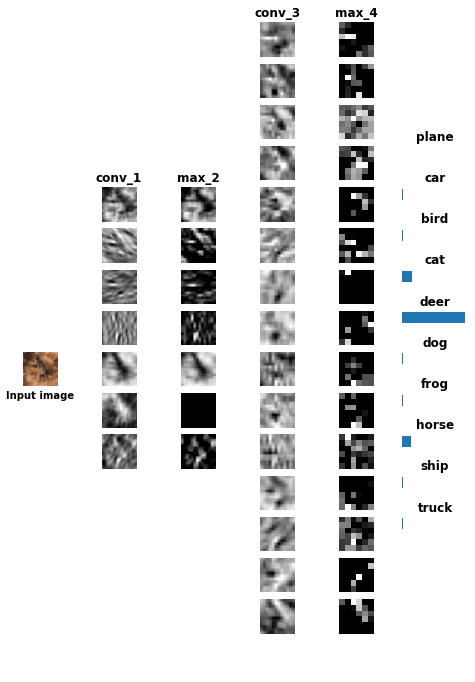

In [20]:
# Getting the outputs of each convolutional layers and the final linear layer
model.conv_1.register_forward_hook(get_activation('conv_1'))
model.max_2.register_forward_hook(get_activation('max_2'))
model.conv_3.register_forward_hook(get_activation('conv_3'))
model.max_4.register_forward_hook(get_activation('max_4'))
model.lin_7.register_forward_hook(get_activation('lin_7'))

X, y = next(iter(traindataloader)) # loading a batch of training image data
X=X.to(device) # To GPU
img=X[0]# Picking only the first image
model_output = model(img.expand(1,3,32,32))  # getting the model output

n_plots=[7,7,15,15] # n_plots variable captures number of plots in a columns (= number of output channels)
layers=['conv_1','max_2','conv_3','max_4'] # layers corresponding to the above outputs

n_r=max(n_plots)+1 # Number of rows of subplots
n_c=len(n_plots)+2 # Number of columns of subplots

fig,ax = plt.subplots(n_r,n_c,figsize=(n_r*2,n_c*2),sharex='col',
                      subplot_kw={'frame_on':False,'xticks':[],'yticks':[]})
# Plotting the input image
ax[round(n_r/2)][0].imshow(img.cpu().permute(1, 2, 0))
ax[round(n_r/2)][0].set_xlabel('Input image',fontweight='bold')

# Plotting the outputs from each of the convoutional and max pooling layer
for i,p in enumerate(n_plots):
  output = activation[layers[i]]
  init_idx = round((n_r-p)/2)
  for j in range(p):
    ax[init_idx+j][(i+1)].imshow(output[0][j].cpu(),cmap='gray')
    if j==0:
      ax[init_idx+j][(i+1)].set_title(layers[i],fontweight='bold')

# Plotting the outputs in the final layer of the CNN
init_idx = round((n_r-10)/2)
output = F.softmax(activation['lin_7'],dim=-1)
for i in range(10):
  ax[init_idx+i][-1].barh(0,output[0][i].cpu())
  ax[init_idx+i][-1].set_ylim(-2,0.5)
  ax[init_idx+i][-1].set_title(label_class[i],fontweight='bold')
plt.subplots_adjust(left=0.2,right=0.4)